# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


# Generating a synthetic dataset

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for 1000 samples
num_samples = 1000
stress = np.random.uniform(100, 1000, num_samples)  # Random stress values
strain = np.random.uniform(0.01, 0.1, num_samples)  # Random strain values
temperature = np.random.uniform(20, 100, num_samples)  # Random temperature values

# Failure condition (0 or 1), simulated based on stress, strain, and temperature
failure_condition = (stress * strain / temperature > 1.5).astype(int)

# Create DataFrame
data = pd.DataFrame({
    'stress': stress,
    'strain': strain,
    'temperature': temperature,
    'failure_condition': failure_condition
})

# Quick overview of the synthetic dataset
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   stress             1000 non-null   float64
 1   strain             1000 non-null   float64
 2   temperature        1000 non-null   float64
 3   failure_condition  1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB
None
            stress       strain  temperature  failure_condition
count  1000.000000  1000.000000  1000.000000        1000.000000
mean    541.230898     0.055632    60.192458           0.078000
std     262.923626     0.026297    23.253936           0.268306
min     104.168821     0.010290    20.000931           0.000000
25%     312.375941     0.031697    40.908078           0.000000
50%     547.126639     0.056686    60.049114           0.000000
75%     769.887629     0.078442    80.728282           0.000000
max     999.745906     0.099947    99.8

# Data Preprocessing

In [ ]:
# Check if there are any missing values
print(data.isnull().sum())  # Should return 0 for all columns in the synthetic dataset

# Feature selection
features = data[['stress', 'strain', 'temperature']]
target = data['failure_condition']

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame for easier readability
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)


stress               0
strain               0
temperature          0
failure_condition    0
dtype: int64


# Training and Evaluating the Decision Tree Classifier

In [ ]:
# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.3, random_state=42)
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the model
decision_tree_accuracy = clf.score(X_test, y_test)
print(f"Decision Tree Accuracy: {decision_tree_accuracy}")


Decision Tree Accuracy: 0.9666666666666667


# Logistic Regression

In [ ]:
# Initialize and train the Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Evaluate the model
log_accuracy = log_model.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {log_accuracy}")


Logistic Regression Accuracy: 0.9566666666666667


# Deep Learning Model (using TensorFlow and Keras)

In [ ]:
# Build the Deep Learning Model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Deep Learning Model Accuracy: {test_acc}")
plt.savefig('training_validation_accuracy.png')



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8782 - loss: 0.6441
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9277 - loss: 0.4590 
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9214 - loss: 0.3201 
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9098 - loss: 0.2777 
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9051 - loss: 0.2622
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9136 - loss: 0.2180
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9207 - loss: 0.1815
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9250 - loss: 0.1542
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9273 - loss: 0.1452
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9293 - loss: 0.1369
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9527 - loss: 0.1224  
Deep Learning Model Accuracy: 0.9633333086967468


<Figure size 640x480 with 0 Axes>

# Analyze the Results

In [ ]:
print(f"Decision Tree Accuracy: {decision_tree_accuracy}")
print(f"Logistic Regression Accuracy: {log_accuracy}")
print(f"Deep Learning Model Accuracy: {test_acc}")


Decision Tree Accuracy: 0.9666666666666667
Logistic Regression Accuracy: 0.9566666666666667
Deep Learning Model Accuracy: 0.9466666579246521


# Plotting and Visualizations

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9556 - loss: 0.1098 - val_accuracy: 0.9643 - val_loss: 0.0911
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9667 - loss: 0.1080 - val_accuracy: 0.9857 - val_loss: 0.0821
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9737 - loss: 0.0976 - val_accuracy: 0.9786 - val_loss: 0.0740
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9658 - loss: 0.0951 - val_accuracy: 0.9857 - val_loss: 0.0670
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9746 - loss: 0.0848 - val_accuracy: 0.9857 - val_loss: 0.0612
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9721 - loss: 0.0855 - val_accuracy: 0.9857 - val_loss: 0.0564
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9839 - loss: 0.0717 - val_accuracy: 0.9929 - val_loss: 0.0520
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9758 - loss: 0.0682 - val_accuracy: 1.0000 - val_loss:

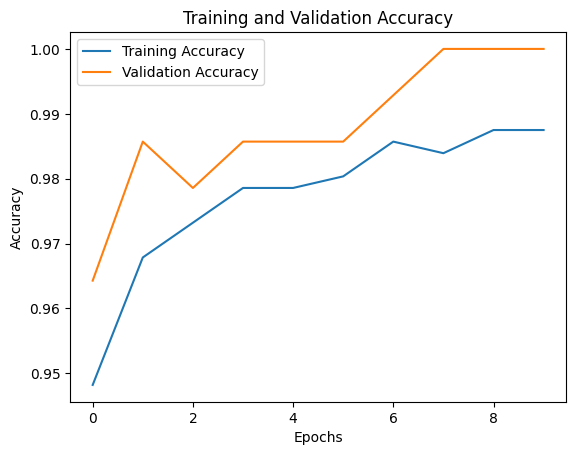

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the training accuracy of the deep learning model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('training_validation_accuracy.png')


# Saving the Models

In [ ]:
import joblib

# Save the decision tree model
joblib.dump(clf, 'decision_tree_model.pkl')

# Save the logistic regression model
joblib.dump(log_model, 'logistic_regression_model.pkl')

# Save the deep learning model
model.save('deep_learning_model.h5')
